<a href="https://colab.research.google.com/github/Shakira25/MyData/blob/main/Sgkit_Genomics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install sgkit

     |████████████████████████████████| 117 kB 4.3 MB/s 
     |████████████████████████████████| 148 kB 34.3 MB/s 
     |████████████████████████████████| 153 kB 65.0 MB/s 
     |████████████████████████████████| 134 kB 64.4 MB/s 
     |████████████████████████████████| 837 kB 67.3 MB/s 
     |████████████████████████████████| 830 kB 51.7 MB/s 
     |████████████████████████████████| 822 kB 52.9 MB/s 
     |████████████████████████████████| 802 kB 27.4 MB/s 
     |████████████████████████████████| 802 kB 48.2 MB/s 
     |████████████████████████████████| 793 kB 50.7 MB/s 
     |████████████████████████████████| 793 kB 55.4 MB/s 
     |████████████████████████████████| 791 kB 54.9 MB/s 
     |████████████████████████████████| 786 kB 48.9 MB/s 
     |████████████████████████████████| 779 kB 51.3 MB/s 
     |████████████████████████████████| 778 kB 49.4 MB/s 
     |████████████████████████████████| 776 kB 48.3 MB/s 
     |████████████████████████████████| 769 kB 51.5 MB/s 
     |█████████

How to access and visualize data like this using Xarray

In [1]:
import sgkit as sg

In [2]:
ds = sg.simulate_genotype_call_dataset(n_variant=1000, n_sample=250, n_contig=23, missing_pct=.1)

In [3]:
print(ds)

<xarray.Dataset>
Dimensions:             (alleles: 2, ploidy: 2, samples: 250, variants: 1000)
Dimensions without coordinates: alleles, ploidy, samples, variants
Data variables:
    variant_contig      (variants) int64 0 0 0 0 0 0 0 ... 22 22 22 22 22 22 22
    variant_position    (variants) int64 0 1 2 3 4 5 6 ... 36 37 38 39 40 41 42
    variant_allele      (variants, alleles) |S1 b'G' b'A' b'T' ... b'A' b'T'
    sample_id           (samples) <U4 'S0' 'S1' 'S2' ... 'S247' 'S248' 'S249'
    call_genotype       (variants, samples, ploidy) int8 0 0 1 0 1 ... 0 0 0 0 1
    call_genotype_mask  (variants, samples, ploidy) bool False False ... False
Attributes:
    contigs:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
    source:   sgkit-0.4.0


In [ ]:
# The presence of a single-nucleotide variant (SNV) is indicated above by the call_genotype variable, which contains an integer value corresponding to the index of the associated allele present 
#(i.e. index into the variant_allele variable) for a sample at a given genome coordinate and chromosome. 
# Every sgkit variable has a set of fixed semantics like this. 
# For more information on this specific variable and any others, see Genetic variables.

In [5]:
new_ds = sg.simulate_genotype_call_dataset(n_variant=100, n_sample=50, n_contig=23, missing_pct=.1)
print(new_ds)
# ploidy, in genetics is the number of chromosomes occurring in the nucleus of a cell.
# Allele is one of two or more versions of a gene 

<xarray.Dataset>
Dimensions:             (alleles: 2, ploidy: 2, samples: 50, variants: 100)
Dimensions without coordinates: alleles, ploidy, samples, variants
Data variables:
    variant_contig      (variants) int64 0 0 0 0 0 1 1 ... 21 21 21 22 22 22 22
    variant_position    (variants) int64 0 1 2 3 4 0 1 2 3 ... 3 0 1 2 3 0 1 2 3
    variant_allele      (variants, alleles) |S1 b'T' b'C' b'C' ... b'T' b'A'
    sample_id           (samples) <U3 'S0' 'S1' 'S2' 'S3' ... 'S47' 'S48' 'S49'
    call_genotype       (variants, samples, ploidy) int8 0 0 1 0 1 ... 1 0 1 0 0
    call_genotype_mask  (variants, samples, ploidy) bool False False ... False
Attributes:
    contigs:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
    source:   sgkit-0.4.0


In [6]:
# Subset the entire dataset to the first 10 variants/samples
new_ds.isel(variants=slice(10), samples=slice(10))

<xarray.Dataset>
Dimensions:             (alleles: 2, ploidy: 2, samples: 10, variants: 10)
Dimensions without coordinates: alleles, ploidy, samples, variants
Data variables:
    variant_contig      (variants) int64 0 0 0 0 0 1 1 1 1 1
    variant_position    (variants) int64 0 1 2 3 4 0 1 2 3 4
    variant_allele      (variants, alleles) |S1 b'T' b'C' b'C' ... b'T' b'A'
    sample_id           (samples) <U3 'S0' 'S1' 'S2' 'S3' ... 'S7' 'S8' 'S9'
    call_genotype       (variants, samples, ploidy) int8 0 0 1 0 1 ... 0 1 1 1 1
    call_genotype_mask  (variants, samples, ploidy) bool False False ... False
Attributes:
    contigs:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
    source:   sgkit-0.4.0

In [8]:
# Subset to a specific set of variables
new_ds[['variant_allele', 'call_genotype']]

<xarray.Dataset>
Dimensions:         (alleles: 2, ploidy: 2, samples: 50, variants: 100)
Dimensions without coordinates: alleles, ploidy, samples, variants
Data variables:
    variant_allele  (variants, alleles) |S1 b'T' b'C' b'C' ... b'T' b'T' b'A'
    call_genotype   (variants, samples, ploidy) int8 0 0 1 0 1 0 ... 0 1 0 1 0 0
Attributes:
    contigs:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
    source:   sgkit-0.4.0

In [9]:
# Access the alleles corresponding to the calls for the first variant and sample
allele_indexes = new_ds.call_genotype[0, 0]
print(allele_indexes)

<xarray.DataArray 'call_genotype' (ploidy: 2)>
array([0, 0], dtype=int8)
Dimensions without coordinates: ploidy
Attributes:
    mixed_ploidy:  False
    comment:       Call genotype. Encoded as allele values (0 for the referen...


In [10]:
allele_indexes_2 = new_ds.call_genotype[10, 10]
print(allele_indexes_2)

<xarray.DataArray 'call_genotype' (ploidy: 2)>
array([1, 1], dtype=int8)
Dimensions without coordinates: ploidy
Attributes:
    mixed_ploidy:  False
    comment:       Call genotype. Encoded as allele values (0 for the referen...


In [11]:
# Larger subsets of data can be visualized and/or summarized through various sgkit utilities as well as the Pandas/Xarray integration:
ds_new = sg.simulate_genotype_call_dataset(n_variant=1000, n_sample=250, missing_pct=.1)
# Show genotype calls with domain-specific display logic
sg.display_genotypes(ds, max_variants=8, max_samples=8)

samples,S0,S1,S2,S3,...,S246,S247,S248,S249
variants,,,,,,,,,
0,0/0,1/0,1/0,0/1,...,1/1,0/0,1/1,1/0
1,0/0,0/1,1/1,1/1,...,0/1,1/0,0/.,0/0
2,1/1,0/1,1/0,0/1,...,0/0,1/1,0/1,./1
3,1/0,1/0,1/0,1/0,...,1/1,1/0,0/1,1/.
...,...,...,...,...,...,...,...,...,...
6,0/.,1/1,1/1,0/0,...,./.,0/0,1/0,./0
7,0/0,./0,1/0,1/1,...,1/.,1/0,1/1,./1
8,0/1,0/1,1/1,1/0,...,0/0,0/0,0/1,./1
9,1/0,0/1,1/0,1/1,...,0/1,1/0,0/0,0/1


In [12]:
# A naive version of the above is also possible using only Xarray/Pandas and
# illustrates the flexibility that comes from being able to transition into
# and out of array/dataframe representations easily
(ds.call_genotype[:5, :5].to_series()
    .unstack().where(lambda df: df >= 0, None).fillna('.')
    .astype(str).apply('/'.join, axis=1).unstack())

samples,0,1,2,3,4
variants,,,,,
0,0.0/0,1.0/0,1.0/0,0.0/1,./0
1,0.0/0,0.0/1,1.0/1,1.0/1,./0
2,1.0/1,0.0/1,1.0/0,0.0/1,1.0/0
3,1.0/0,1.0/0,1.0/0,1.0/0,1.0/1
4,./1,./1,1.0/1,0.0/0,0.0/1


In [16]:
import pandas as pd
df = ~ds.call_genotype_mask.to_dataframe()
print(df)

                         call_genotype_mask
variants samples ploidy                    
0        0       0                     True
                 1                     True
         1       0                     True
                 1                     True
         2       0                     True
...                                     ...
999      247     1                     True
         248     0                     True
                 1                     True
         249     0                     True
                 1                     True

[500000 rows x 1 columns]


In [19]:
call_rates = df.groupby('variants').mean()

call_rates.head()

,call_genotype_mask
variants,
0,0.898
1,0.910
2,0.926
3,0.894
4,0.892


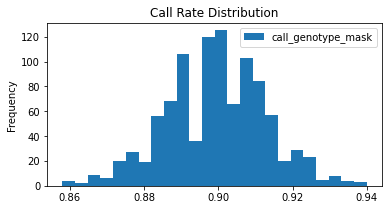

In [20]:
call_rates.plot(kind='hist', bins=24, title='Call Rate Distribution', figsize=(6, 3))

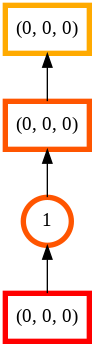

In [21]:
dsnew1 = ds_new.chunk({"variants": 25, "samples": 25})

counts = sg.count_call_alleles(ds).call_allele_count.data
counts.visualize(filename="order", optimize_graph=True, color="order", cmap="autumn", node_attr={"penwidth": "4"})